In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sns

# Dataset choice

## Dataset 1

In [ ]:
%%bash
CUDA_VISIBLE_DEVICES="0" python vedadet/tools/infer_mask.py vedadet/configs/infer/tinaface/tinaface.py dataset/first_approach/with_mask dataset/first_approach/tina_detections/with_mask.json

In [ ]:
%%bash
CUDA_VISIBLE_DEVICES="0" python vedadet/tools/infer_mask.py vedadet/configs/infer/tinaface/tinaface.py dataset/first_approach/without_mask dataset/first_approach/tina_detections/without_mask.json

In [ ]:
%%bash
CUDA_VISIBLE_DEVICES="0" python vedadet/tools/infer_mask.py vedadet/configs/infer/tinaface/tinaface.py dataset/first_approach/incorrect_mask dataset/first_approach/tina_detections/incorrect_mask.json

In [17]:
import json
with open("dataset/first_approach/tina_detections/with_mask.json") as file:
    mask_face = json.load(file)

with open("dataset/first_approach/tina_detections/without_mask.json") as file:
    nonmask_face = json.load(file)

with open("dataset/first_approach/tina_detections/incorrect_mask.json") as file:
    incorrect_face = json.load(file)    

In [49]:
many_faces = []
faces_count = []
lots_faces = []
photo_size = []
faces_size = []
face_perc_area = []
for cat in [mask_face, nonmask_face, incorrect_face]:
    for i in range(len(cat)):
        img = cat[str(i)]
        faces_no = len(img["objects"])
        faces_count.append(faces_no)
        filename = img["filename"]
        image = cv.imread(filename)
        img_size = image.shape[0]*image.shape[1]
        photo_size.append(img_size**0.5) 
        for j in range(faces_no):
            bbox = img["objects"][str(j)]["coordinates"]
            face_size = (int(float(bbox["x_max"])) - int(float(bbox["x_min"])))*(int(float(bbox["y_max"])) - int(float(bbox["y_min"])))
            faces_size.append(face_size**0.5)
            face_perc_area.append(100*face_size/img_size)
        if faces_no > 1:
            many_faces.append(filename)
            if faces_no >= 4:
                lots_faces.append(filename)

In [32]:
sns.set(font_scale=1.0)

In [52]:
photo_size = [size/10**3 for size in photo_size]

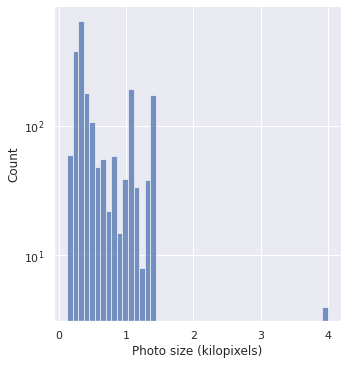

In [63]:
fig = sns.displot(photo_size)
for ax in fig.axes.flat:
    ax.set_yscale('log')
    ax.set(xlabel='Photo size (kilopixels)')
fig

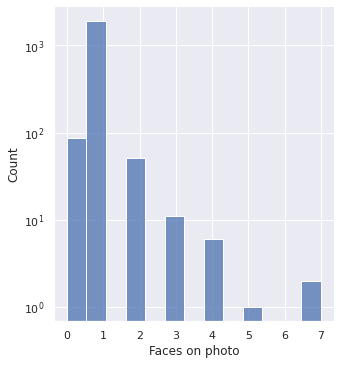

In [60]:
fig = sns.displot(faces_count)
for ax in fig.axes.flat:
    ax.set_yscale('log')
    ax.set(xlabel='Faces on photo')
fig

In [56]:
faces_size = [size/10**3 for size in faces_size]

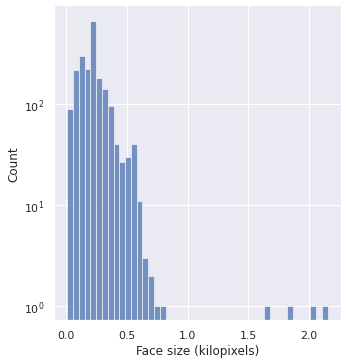

In [66]:
fig = sns.displot(faces_size, bins=int((len(faces_size))**(0.5)))
for ax in fig.axes.flat:
    ax.set_yscale('log')
    ax.set(xlabel='Face size (kilopixels)')
fig

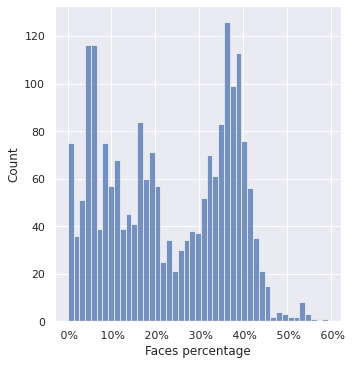

In [70]:
import matplotlib.ticker as tkr
fig = sns.displot(face_perc_area, bins=int((len(face_perc_area))**(0.5)))
for ax in fig.axes.flat:
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x: .0f}%'))
    ax.set(xlabel='Faces percentage')
fig

In [ ]:
for img_file in lots_faces:
    img = cv.imread(img_file)
    plt.axis('off')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()